# 2110443 - Computer Vision (2018/1)
## Lab 2 - Basic Image Processing
In this lab, we will play with basic image pixel manipulation in grayscale images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

Import OpenCV, Numpy and Matplotlib as always

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import urllib.request
import json
%matplotlib inline
from IPython.display import clear_output
import IPython.display

Use <a href="https://docs.opencv.org/3.4.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56">imread</a>  function to read image from file in <b>grayscale</b> format and display its dimension

In [4]:
inputImage = cv2.imread("assets/lena_std.tif",cv2.IMREAD_GRAYSCALE)
print('inputImage variable data type =>', type(inputImage))
print('inputImage variable numpy data type =>', inputImage.dtype)
print('inputImage dimensions', inputImage.shape)
print(inputImage)

inputImage variable data type => <class 'numpy.ndarray'>
inputImage variable numpy data type => uint8
inputImage dimensions (512, 512)
[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


We need to specify matplotlib imshow <a href="https://matplotlib.org/tutorials/colors/colormaps.html">colormap</a> (cmap) as gray to display grayscale images.

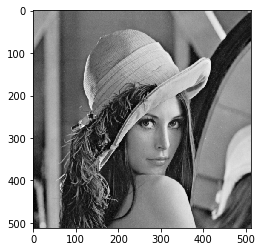

In [5]:
plt.imshow(inputImage, cmap='gray')
plt.show()

## Pixel Manipulation
You can use your old numpy knowledge here!

In [19]:
%%time
# Bad practice, you should not do this
inputImageTest = inputImage.copy()
for row in range(0,100):
    for col in range(0,inputImageTest.shape[1]):
        inputImageTest[row,col] = 255

CPU times: user 16.8 ms, sys: 581 µs, total: 17.4 ms
Wall time: 16.9 ms


In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(inputImageTest, cmap='gray')
plt.show()

In [5]:
%%time
# Vectorization version is a lot faster
inputImageTest = inputImage.copy()
inputImageTest[0:100,:] = 255

CPU times: user 1.04 ms, sys: 985 µs, total: 2.02 ms
Wall time: 864 µs


In [8]:
a = np.array([[1,2,3],[4,5,6]])
print(np.multiply(a,a))

[[ 1  4  9]
 [16 25 36]]


## Assignment 1 - Pixel Manipulation
Use the provided mask to crop the famous "Lena Soderberg" face. 
Hint: - Only <b>Basic</b> numpy knowledge is required here! 

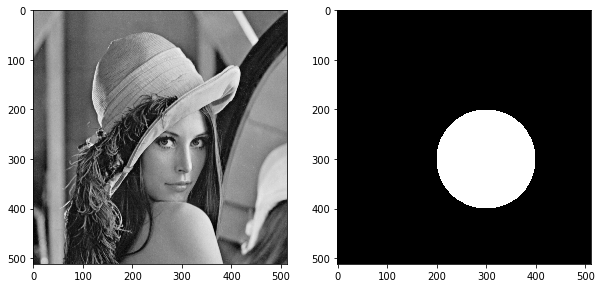

In [7]:
circleMask = np.zeros_like(inputImage)
cv2.circle(circleMask,(300,300), 100, (255),-1)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(inputImage, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(circleMask, cmap='gray')
plt.show()

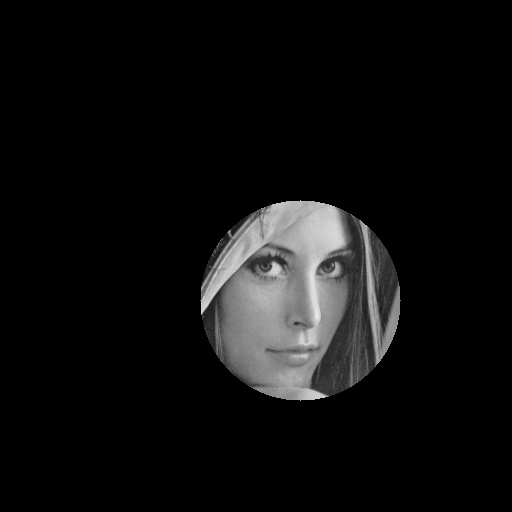

In [8]:
### FILL HERE ###
img = inputImage.copy()
output = np.multiply(img, circleMask / 255)
_, buffer = cv2.imencode(".jpg", output)
IPython.display.display(IPython.display.Image(data=buffer))
#################

## Basic Image Filtering
OpenCV already provided us with a wide range of filtering operation. The most common one is image blurring which is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image.

### 1. Averaging using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37">cv2.blur</a> function.
Simply takes the average of all the pixels in the kernel area

In [18]:
def cv2Blur(kernelSize):
    blurImage = cv2.blur(inputImage,(kernelSize,kernelSize))
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(cv2Blur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1));

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), Output()), _dom_cla…

### 2. Median Blur using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9">cv2.medianBlur</a>
Read the document and try to "mimic" the above interactive visualization!

In [19]:
### FILL HERE ###
def cv2Blur(kernelSize):
    blurImage = cv2.medianBlur(inputImage,kernelSize)
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(cv2Blur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1));
#################

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), Output()), _dom_cla…

### 3. Gaussian Blur using <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1">cv2.GaussianBlur</a>
Gaussian blurring is highly effective in removing gaussian noise from the image.

In [20]:
def cv2GaussianBlur(kernelSize,sigmaX):
    gaussianBlurImage = cv2.GaussianBlur(inputImage,(kernelSize,kernelSize),sigmaX)
#     print(cv2.getGaussianKernel(kernelSize,sigmaX))
    plt.figure(figsize=(5,5))
    plt.imshow(gaussianBlurImage, cmap='gray')
    plt.show()
interact(cv2GaussianBlur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1),sigmaX=widgets.IntSlider(min=1,max=35,step=2,value=1));

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), IntSlider(value=1, …

### 4. Bilateral Filter ==> <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed">cv2.bilateralFilter</a>
Read the document and try to "mimic" the above interactive visualization! 

In [21]:
### FILL HERE ###
def cv2Blur(kernelSize,sigmaColor,sigmaSpace):
    image = inputImage
    BlurImage = cv2.bilateralFilter(image,kernelSize,sigmaColor,sigmaSpace)
#     print(cv2.getGaussianKernel(kernelSize,sigmaX))
    plt.figure(figsize=(5,5))
    plt.imshow(BlurImage, cmap='gray')
    plt.show()
interact(cv2Blur, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=1),sigmaColor=widgets.IntSlider(min=1,max=35,step=2,value=1),sigmaSpace=widgets.IntSlider(min=1,max=35,step=2,value=1));
#################

interactive(children=(IntSlider(value=1, description='kernelSize', max=35, min=1, step=2), IntSlider(value=1, …

### 5. Custom Kernel Filtering ==> <a href="https://docs.opencv.org/3.4.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04">cv2.filter2D</a>

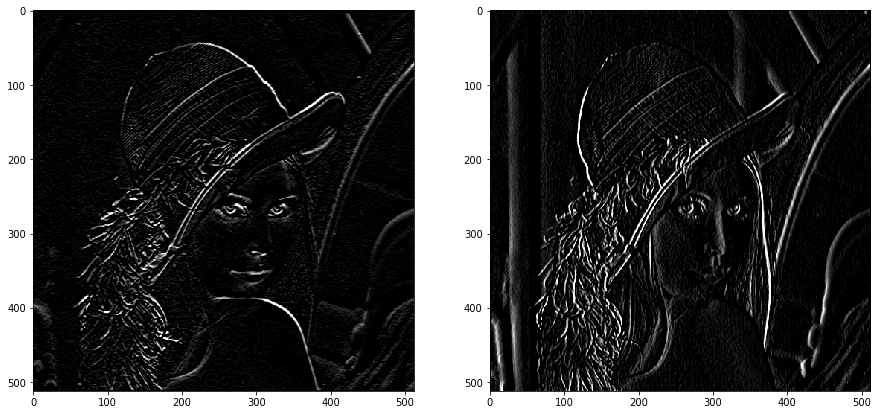

'\nWhat are these mysterious kernels do in your opinion?\n\nThe filters are edge filter similar to sobel filter, which emphasizes certain angle of edges in the picture.\nThis assumption can be supported by adding two products of different angles of the filter. It creates a \npicture with more completed edges as a result.\n\n'

In [22]:
xKernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) # Mysterious Kernel?
yKernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filter2DOutput1 = cv2.filter2D(inputImage,-1,xKernel)
filter2DOutput2 = cv2.filter2D(inputImage,-1,yKernel)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(filter2DOutput1, cmap='gray')
plt.subplot(1,2,2)
# plt.imshow(filter2DOutput2 + filter2DOutput1, cmap='gray')
plt.imshow(filter2DOutput2 , cmap='gray')
plt.show()

'''
What are these mysterious kernels do in your opinion?

The filters are edge filter similar to sobel filter, which emphasizes certain angle of edges in the picture.
This assumption can be supported by adding two products of different angles of the filter. It creates a 
picture with more completed edges as a result.

'''

## Assignment 2 - Which filter is the best?
The provided api are generated the random artificial noise into image. Your task is to implement the best way <b>(in your opinion)</b> to remove/eliminate those noise. Don't forget to state your reason in the following block. Answer can be in Thai or English.

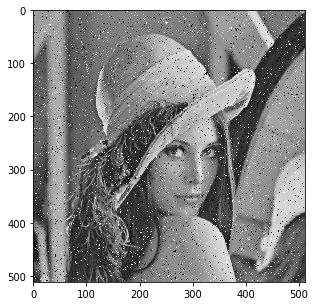

uint8


In [23]:
out1 = np.array(json.loads(urllib.request.urlopen('https://cgci.cp.eng.chula.ac.th/cv2018/lab2/noise1').read().decode('utf-8')),dtype=np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(out1, cmap='gray')
plt.show()
print(out1.dtype)

In [24]:
### FILL HERE ###
def cv2OutBlur2(kernelSize):
    blurImage = cv2.medianBlur(out1,kernelSize)
    plt.figure(figsize=(5,5))
    plt.imshow(blurImage, cmap='gray')
    plt.show()
interact(cv2OutBlur2, kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=5));

#################
'''
State your reason in this block!
1. Either median or mode should be the best blur filter in this condition. 
2. The reason that averaging filter doesn't work well is becuase salt & pepper noise
    can cause major shift in gray level from their huge swing of blackness and whiteness.
3. Bilateral filter doesn't work well becuase it's ability to reserve edges makes the filter
    picks up noises. Noises cause high difference in gray level between pixels which is 
    equivalent to edges.

'''

interactive(children=(IntSlider(value=5, description='kernelSize', max=35, min=1, step=2), Output()), _dom_cla…

"\nState your reason in this block!\n1. Either median or mode should be the best blur filter in this condition. \n2. The reason that averaging filter doesn't work well is becuase salt & pepper noise\n    can cause major shift in gray level from their huge swing of blackness and whiteness.\n3. Bilateral filter doesn't work well becuase it's ability to reserve edges makes the filter\n    picks up noises. Noises cause high difference in gray level between pixels which is \n    equivalent to edges.\n\n"

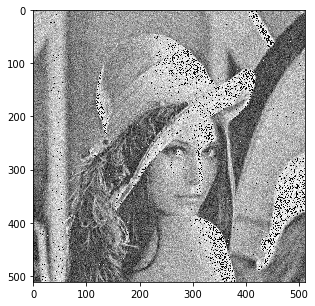

In [25]:
out2 = np.array(json.loads(urllib.request.urlopen('https://cgci.cp.eng.chula.ac.th/cv2018/lab2/noise2').read().decode('utf-8')),dtype=np.uint8)
plt.figure(figsize=(5,5))
plt.imshow(out2, cmap='gray')
plt.show()

In [26]:
### FILL HERE ###

def bone2(thresh, kernelSize,sigmaColor,sigmaSpace, kernelSize2):
    tmp = out2.copy()
    tmp[tmp<thresh] = 255
#     tmp = cv2.medianBlur(tmp,kernelSize)
    tmp = cv2.bilateralFilter(tmp,kernelSize,sigmaColor,sigmaSpace)
    tmp = cv2.blur(tmp,(kernelSize2, kernelSize2))
    plt.figure(figsize=(5,5))
    plt.imshow(tmp, cmap='gray')
    plt.show()
interact(bone2, thresh=widgets.IntSlider(min=1,max=60,step=1,value=40),kernelSize=widgets.IntSlider(min=1,max=35,step=2,value=23),sigmaColor=widgets.IntSlider(min=1,max=35,step=2,value=25),sigmaSpace=widgets.IntSlider(min=1,max=35,step=2,value=25),kernelSize2=widgets.IntSlider(min=1,max=35,step=1,value=3));



#################
'''
State your reason in this block!

1. Black noises appears to happen from pixels with high amount of gray level. These noises can be addressed
    by changing them into white instead of black using certain amoiunt of threshold.
2. After thresholded the image, we can use bilateral filter to filter out significant noises without loosing
    the data of edges. This works because of low contrast of the noise(it is not salt&pepper)
3. After filtered by bilateral filter, the noise left can be reduced by using simple averaging filter.

'''

interactive(children=(IntSlider(value=40, description='thresh', max=60, min=1), IntSlider(value=23, descriptio…

'\nState your reason in this block!\n\n1. Black noises appears to happen from pixels with high amount of gray level. These noises can be addressed\n    by changing them into white instead of black using certain amoiunt of threshold.\n2. After thresholded the image, we can use bilateral filter to filter out significant noises without loosing\n    the data of edges. This works because of low contrast of the noise(it is not salt&pepper)\n3. After filtered by bilateral filter, the noise left can be reduced by using simple averaging filter.\n\n'

## Assignment 3 - Implementing your own filter2D function
![title](assets/Lab2-filter2D.png)

In this part, you will implement the image filter function by yourself. This function should have the function signature as shown below.
```python
def myFilter2D(inputImage, kernel, paddingMethod="constant", paddingValue=0):
    if paddingMethod == "constant":
        Myterious operations A
    elif paddingMethod == "replicate":
        Myterious operations B
    elif paddingMethod == "valid":
        Myterious operations C
    else
        print("Undefined padding method")
    return outputImage
```
You must implement 3 padding method
1. Constant ("constant")
2. Replicate border value ("replicate")
3. No Padding ("valid")

<b>Hint</b>: Numpy has a padding function! Use Google!!!

constant filtered:
padded shape:  (522, 522)
output shape:  512 512


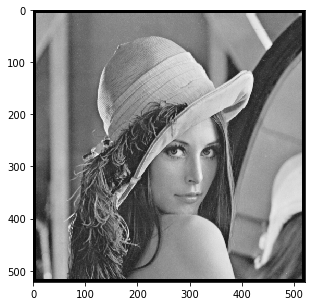

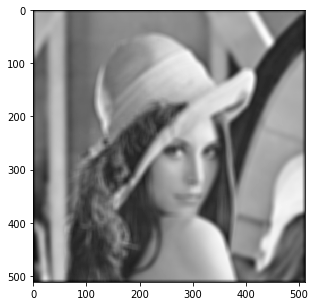

replicate filtered:
padded shape:  (522, 522)
output shape:  512 512


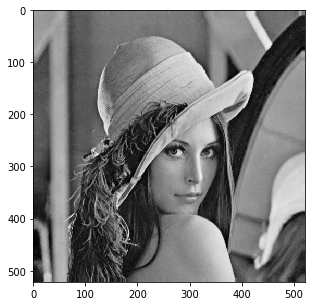

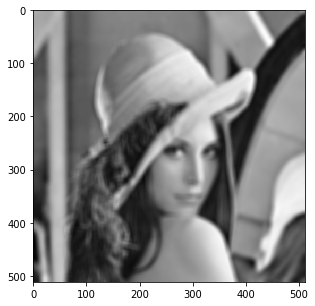

valid filtered:
padded shape:  (512, 512)
output shape:  502 502


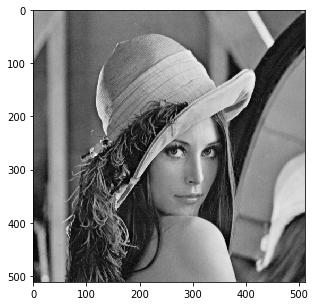

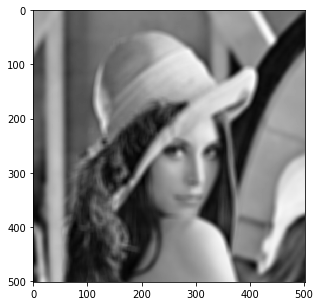

In [27]:
def opA(image, padding):
#     padding = int(kernelSize - 1 / 2)
    tmp = np.zeros((int(image.shape[0] + padding * 2), int(inputImage.shape[1] + padding * 2)))
    tmp[padding: inputImage.shape[0] + padding, padding: inputImage.shape[1] + padding] = image
    return tmp

def opB(image, padding):
#     padding = int((kernelSize - 1) / 2)
    tmp = np.zeros((int(image.shape[0] + padding * 2), int(inputImage.shape[1] + padding * 2)))
    tmp[padding: inputImage.shape[0] + padding, padding: inputImage.shape[1] + padding] = image
    tmp[:padding,:] = tmp[padding,:]
    tmp[padding+inputImage.shape[0]:,:] = tmp[padding + inputImage.shape[0] - 1,:]
    tmp[:,:padding] = tmp[:,padding].reshape((tmp.shape[0],1))
    tmp[:,padding+inputImage.shape[1]:] = tmp[:,padding + inputImage.shape[1] - 1].reshape((tmp.shape[0],1))
    return tmp
    
def boneFilter2D(inputImage, kernel, paddingMethod='constant', paddingValue=0):    
    if paddingMethod == "constant":
        inputImage = opA(inputImage, paddingValue)
    elif paddingMethod == "replicate":
        inputImage = opB(inputImage, paddingValue)
    elif paddingMethod == "valid":
        inputImage = inputImage
    else:
        print("Undefined padding method")
        return inputImage
    
    y_index = int((kernel - 1) / 2)
    _filter = np.ones((kernel,kernel)) / (kernel*kernel)
    print('padded shape: ', inputImage.shape)
    output_height = inputImage.shape[0] - paddingValue * 2
    output_width = inputImage.shape[1] - paddingValue * 2
    print('output shape: ', output_height, output_width)
    outputImage = np.zeros((output_height, output_width))
    plt.figure(figsize=(5,5))
    plt.imshow(inputImage, cmap='gray')
    plt.show()
    half_kernel = int((kernel-1)/2)
    for i in range(output_height):
        x_index = int((kernel - 1) / 2)
        for j in range(output_width):
            tmp = inputImage[y_index-half_kernel:y_index+half_kernel+1, x_index-half_kernel: x_index+half_kernel+1]
            tmp2 = np.multiply(tmp,_filter)
            outputImage[i,j] = tmp2.sum()
            x_index += 1
        y_index += 1
    return outputImage

print('constant filtered:')
tmp = boneFilter2D(inputImage, 11, paddingMethod='constant',paddingValue=5)
plt.figure(figsize=(5,5))
plt.imshow(tmp, cmap='gray')
plt.show()
print('replicate filtered:')
tmp = boneFilter2D(inputImage, 11, paddingMethod='replicate',paddingValue=5)
plt.figure(figsize=(5,5))
plt.imshow(tmp, cmap='gray')
plt.show()
print('valid filtered:')
tmp = boneFilter2D(inputImage, 11, paddingMethod='valid',paddingValue=5)
plt.figure(figsize=(5,5))
plt.imshow(tmp, cmap='gray')
plt.show()